In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/spam.csv', encoding="latin-1")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['Binary_Category']=df['Category'].map({
    'ham':0,
    'spam':1
})

In [17]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


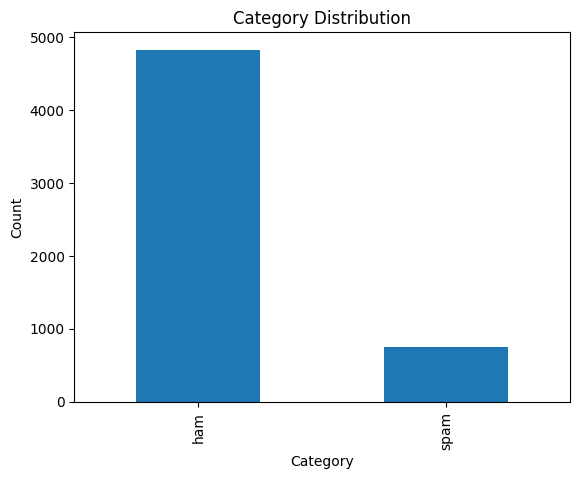

In [19]:
df['Category'].value_counts().plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution")
plt.show()

In [22]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
'''Text Cleaning Function'''

def clean_text(text):
  # lowercase
  text = text.lower()

  # removing numbers and special characters
  text = re.sub(r'[^a-z\s]','',text)

  # removing extra spaces
  text = re.sub(r'\s+',' ',text).strip()

  return text

In [24]:
df['clean_message'] = df['Message'].apply(clean_text)
df.head()

,Category,Message,Binary_Category,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...


In [26]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join(
      word for word in text.split()
      if word not in stop_words
  )

df['clean_message']=df['clean_message'].apply(remove_stopwords)
df.head()

,Category,Message,Binary_Category,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goes usf lives around though


In [27]:
# Text -> Numbers
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['clean_message'])
y = df['Binary_Category']

In [29]:
X.shape

(5572, 3000)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Training Logistic Regression Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
print(f"Training Accuracy : {model.score(X_train,y_train)}")
print(f"Testing Accuracy : {model.score(X_test, y_test)}")

Training Accuracy : 0.9703836661431456
Testing Accuracy : 0.9632286995515695


In [38]:
y_pred = model.predict(X_test)

In [39]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[966,   0],
       [ 41, 108]])

Text(58.222222222222214, 0.5, 'Truth')

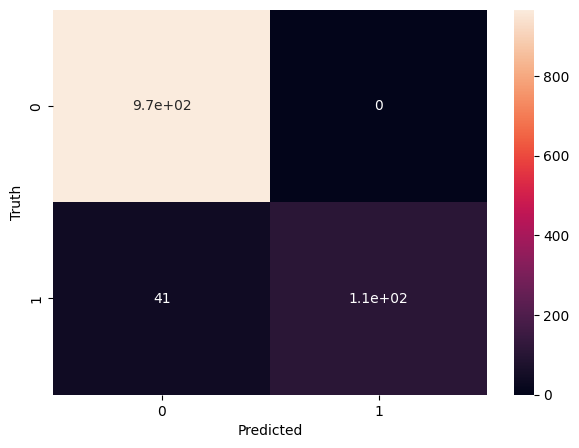

In [40]:
# Visualizing the confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [42]:
def predict_spam(email_text):
  # Step 1: Clean Text
  cleaned = clean_text(email_text)
  cleaned = remove_stopwords(email_text)

  # Step 2: TF-IDF transform
  vector = tfidf.transform([cleaned])

  # Step 3: Prediction
  prediction = model.predict(vector)[0]
  probability = model.predict_proba(vector)[0][1]

  # Step 4: Result
  if prediction == 1:
    print("Spam Email")
  else:
    print("Not Spam Email")

  print(f"Spam Probability : {probability:.4f}")

In [43]:
spam_email = """
Congratulations! You have won a ₹50,000 cash prize.
Click the link now to claim your reward.
"""

predict_spam(spam_email)

Spam Email
Spam Probability : 0.7686


In [44]:
ham_email = """
Hey bro, are we still meeting today at 6 pm?
Let me know.
"""

predict_spam(ham_email)


Not Spam Email
Spam Probability : 0.0236


In [45]:
# Now Training Naive Bayes Model for more accuracy

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [48]:
print(f"Training Accuracy(NB): {nb_model.score(X_train, y_train)}")
print(f"Testing Accuracy(NB): {nb_model.score(X_test, y_test)}")

Training Accuracy(NB): 0.9813776082566749
Testing Accuracy(NB): 0.9713004484304932


In [49]:
# Confusion Matrix (NB)

from sklearn.metrics import confusion_matrix

y_pred_nb = nb_model.predict(X_test)

cm = confusion_matrix(y_test,y_pred_nb)
cm

array([[965,   1],
       [ 31, 118]])

Text(58.222222222222214, 0.5, 'Truth')

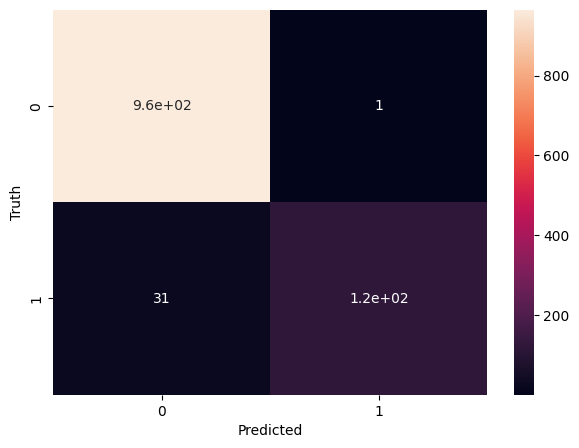

In [50]:
# Visualizing Confusion Matrix (NB)

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
# Classification report (NB)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [52]:
def predict_spam_nb(email_text):
  # Step 1: Clean Text
  cleaned = clean_text(email_text)
  cleaned = remove_stopwords(email_text)

  # Step 2: TF-IDF transform
  vector = tfidf.transform([cleaned])

  # Step 3: Prediction
  prediction = nb_model.predict(vector)[0]
  probability = nb_model.predict_proba(vector)[0][1]

  # Step 4: Result
  if prediction == 1:
    print("Spam Email")
  else:
    print("Not Spam Email")

  print(f"Spam Probability : {probability:.4f}")

In [53]:
spam_email = """
Congratulations! You have won a ₹50,000 cash prize.
Click the link now to claim your reward.
"""

predict_spam_nb(spam_email)

Spam Email
Spam Probability : 0.9785


In [54]:
ham_email = """
Hey bro, are we still meeting today at 6 pm?
Let me know.
"""

predict_spam(ham_email)

Not Spam Email
Spam Probability : 0.0236
